In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# detecting face and eyes

In [2]:
img = cv2.imread('./test_images/ronaldo.jpg', cv2.COLOR_BGR2RGB)
img.shape

(1200, 1200, 3)

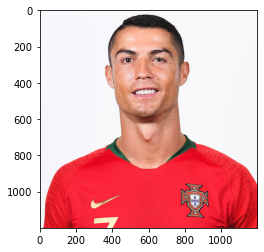

In [3]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixels = np.array(image)

plt.imshow(pixels)
plt.show()

In [4]:
# converting image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1200, 1200)

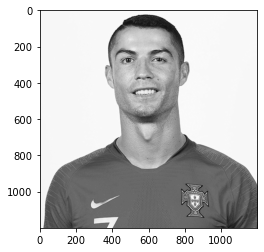

In [5]:
plt.imshow(gray, cmap='gray')

# loading haarcascade model and detecting faces

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[358, 100, 437, 437]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(358, 100, 437, 437)

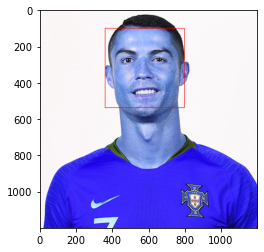

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

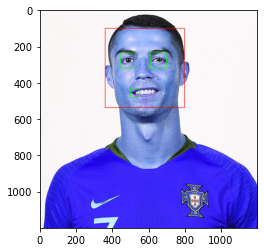

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

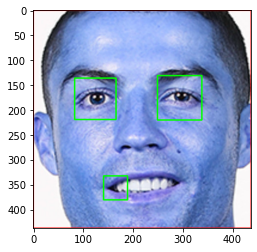

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

# cropping the image

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

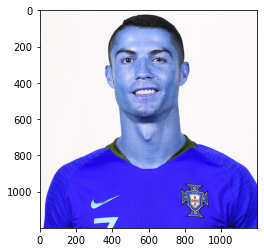

In [12]:
original_image = cv2.imread('./test_images/ronaldo.jpg')
plt.imshow(original_image)

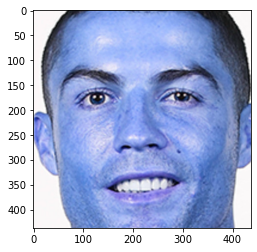

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/ronaldo.jpg')
plt.imshow(cropped_image)

# cropping all the training images

In [14]:
path_to_data = "./image_dataset/"
path_to_cr_data = "./cropped_images/"

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./image_dataset/conor_mcgregor',
 './image_dataset/cristiano_ronaldo',
 './image_dataset/kane williamson',
 './image_dataset/khabib',
 './image_dataset/lionel_messi',
 './image_dataset/virat_kohli']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [18]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
file_read_errors = [] 

for img_dir in img_dirs:
    
    celebrity_name = img_dir.split('/')[-1]
    
    # listing files
    path = img_dir
    files = os.listdir(img_dir)
    print(celebrity_name, "............", len(files), "files")
    
    celebrity_file_names_dict[celebrity_name] = []
    
    count = 0
    # cropping images
    for file in files:       
        try:
            roi_color = get_cropped_image_if_2_eyes(f"{img_dir}/{str(file)}")
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)

                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name 

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)     
                count += 1
   
        except Exception as e:
            file_read_errors.append(str(file)+"\n")
    print(f"{count} faces detected.\n")

with open("./file_read_errors.txt", 'w', encoding="utf-8") as f:
    f.writelines(file_read_errors)
print("--- Done ---")

conor_mcgregor ............ 96 files
Generating cropped images in folder:  ./cropped_images/conor_mcgregor
38 faces detected.

cristiano_ronaldo ............ 97 files
Generating cropped images in folder:  ./cropped_images/cristiano_ronaldo
59 faces detected.

kane williamson ............ 98 files
Generating cropped images in folder:  ./cropped_images/kane williamson
26 faces detected.

khabib ............ 98 files
Generating cropped images in folder:  ./cropped_images/khabib
44 faces detected.

lionel_messi ............ 100 files
Generating cropped images in folder:  ./cropped_images/lionel_messi
41 faces detected.

virat_kohli ............ 97 files
Generating cropped images in folder:  ./cropped_images/virat_kohli
55 faces detected.

--- Done ---
